Practice based on the Chapter book " Practical Statistics for Data Scientists"

In [9]:
import numpy as np
import pandas as pd

In [5]:
medal_count= pd.read_excel("2021 Tokyo olympics data Kaggle\Medals.xlsx") 

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
medal_count.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


#Estimates Of Location

In [4]:
medal_count["Total"].mean()

11.612903225806452

In [10]:
#weighted mean
np.average(medal_count["Total"], weights= medal_count["Gold"])

46.832352941176474

In [11]:
from scipy.stats import trim_mean

0.1 means top 10% and bottom 10% is trimmed and the mean is found of the rest

In [12]:
trim_mean(medal_count["Total"],0.1) 


6.8933333333333335

In [14]:
medal_count["Total"].median()

4.0

In [15]:
#weighted median
#taken function from stack overflow
def weighted_median(df, val, weight):
    df_sorted = df.sort_values(val)
    cumsum = df_sorted[weight].cumsum()  #cumsum is cumulative sum
    cutoff = df_sorted[weight].sum() / 2.
    return df_sorted[cumsum >= cutoff][val].iloc[0]

weighted_median(medal_count,"Total","Gold")

40

In [16]:
#percentiles
q3=np.percentile(medal_count["Total"],75)
q3

11.0

In [17]:
medal_count["Total"].describe()

count     93.000000
mean      11.612903
std       19.091332
min        1.000000
25%        2.000000
50%        4.000000
75%       11.000000
max      113.000000
Name: Total, dtype: float64

#Estimates of Variability

In [12]:
np.var(medal_count["Gold"])

48.78483061625627

In [13]:
from statistics import variance
variance(medal_count.Gold)

49.315100514259

#There is a difference in data variance it may involve n-1 and n and degree of freedom concept[find out]

In [14]:
# Standard Deviation
from statistics import stdev
stdev(medal_count["Gold"])

7.022471111671376

In [16]:
# Mean Absolute Devaiations : Mean of the absolute deviations from the mean,also known as L1-norm or manhattan norm
from numpy import mean, absolute
mean(absolute(c - mean(medal_count["Gold"])))

4.0048560527228485

In [18]:
#perecntiles and interquartile range
q3, q1=np.percentile(medal_count["Gold"], [75,25])
iqr=q3-q1
iqr

3.0

<AxesSubplot:>

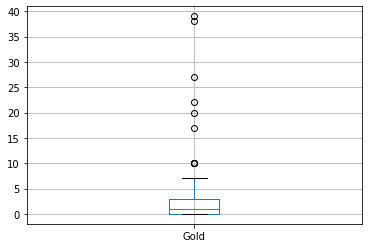

In [19]:
#Box Plots
medal_count.boxplot(column="Gold")

In [20]:
#cut the gold into 10 bins
pd.cut(medal_count["Gold"], 10)

0      (35.1, 39.0]
1      (35.1, 39.0]
2      (23.4, 27.3]
3      (19.5, 23.4]
4      (19.5, 23.4]
          ...      
88    (-0.039, 3.9]
89    (-0.039, 3.9]
90    (-0.039, 3.9]
91    (-0.039, 3.9]
92    (-0.039, 3.9]
Name: Gold, Length: 93, dtype: category
Categories (10, interval[float64, right]): [(-0.039, 3.9] < (3.9, 7.8] < (7.8, 11.7] < (11.7, 15.6] ... (23.4, 27.3] < (27.3, 31.2] < (31.2, 35.1] < (35.1, 39.0]]

In [37]:
#Frequency Table for just looking it is not  a dataframe currently
frequency_table= pd.cut(medal_count["Gold"],10).value_counts()
frequency_table

(-0.039, 3.9]    72
(3.9, 7.8]       11
(7.8, 11.7]       4
(19.5, 23.4]      2
(35.1, 39.0]      2
(15.6, 19.5]      1
(23.4, 27.3]      1
(11.7, 15.6]      0
(27.3, 31.2]      0
(31.2, 35.1]      0
Name: Gold, dtype: int64

In [42]:
#frequnecy table this is dataframe the first line copy() func creates an empty dataframe  {shahshank way}
frequency_table = medal_count.copy()
frequency_table["freq"] = pd.cut(medal_count["Gold"],10)
frequency_table.groupby("freq")["Rank"].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


In [43]:
np.histogram(medal_count["Gold"]) # this only gives the data of the histogram  ot the histogram

(array([72, 11,  4,  0,  1,  2,  1,  0,  0,  2], dtype=int64),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]))

(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <BarContainer object of 30 artists>)

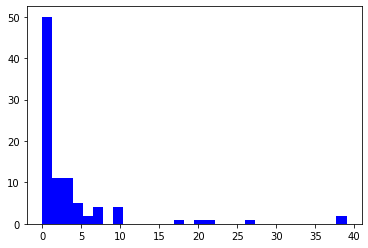

In [47]:
#histogram bins can be changed
import matplotlib.pyplot as plt
plt.hist(x=medal_count["Gold"], bins="auto", color="blue")


(array([72., 11.,  4.,  0.,  1.,  2.,  1.,  0.,  0.,  2.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <BarContainer object of 10 artists>)

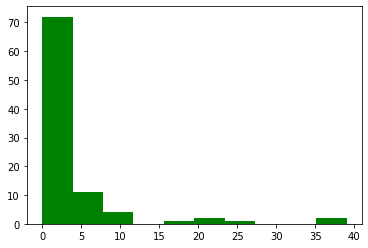

In [49]:
plt.hist(x=medal_count["Gold"], bins=10, color="green")

#Statistical moments
first second third and fourth: Mean variability skewness and kurtosis respectively

#Density Plots Study yourself it is  a smoothened historam with kde . I would recommend use seaborn or matplotlib


In [52]:

#Mode
medal_count["Gold"].mode()

0    0
dtype: int64

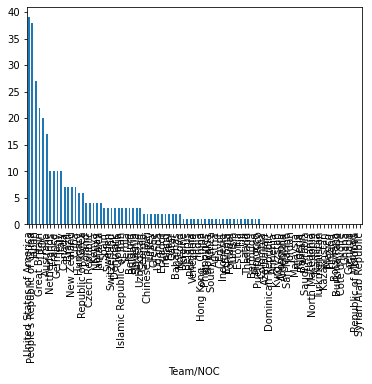

In [53]:
ax= medal_count .plot.bar(x="Team/NOC", y="Gold", legend=False)

Text(0, 0.5, 'Gold Count')

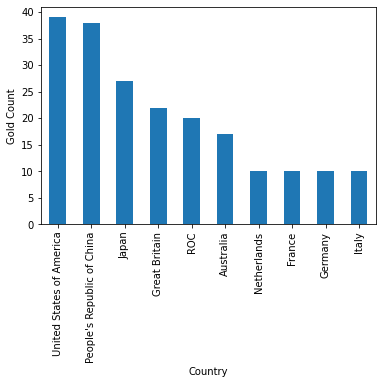

In [59]:
ax= medal_count.iloc[:10, :].plot.bar(x="Team/NOC", y="Gold", legend=False)
ax.set_xlabel("Country")
ax.set_ylabel("Gold Count")

#pie Chart forget about it is ineffiecient  use matplot or seaborn if need be from some website :)

In [60]:
#Correlation Matrix
#positive means one increase other increase and negative means one increase other  decreases
medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

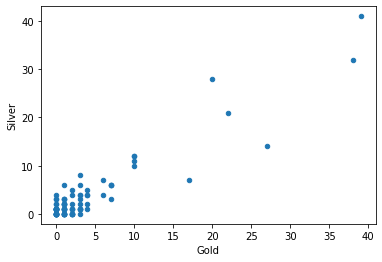

In [61]:
#Scattter Plot 
#It is very much useful when there are lot of data 
medal_count.plot.scatter(x="Gold", y="Silver")

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

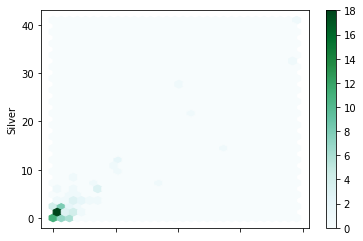

In [62]:
#Hexagonal Plot
medal_count.plot.hexbin(x="Gold", y="Silver", gridsize=30 )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

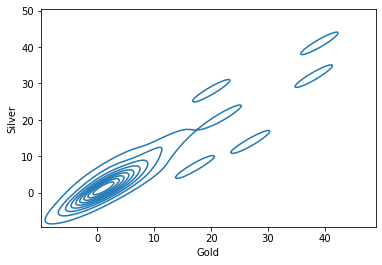

In [72]:
#contour plot
import seaborn as sns
ax = sns.kdeplot(medal_count["Gold"], medal_count["Silver"])
ax       

<AxesSubplot:>

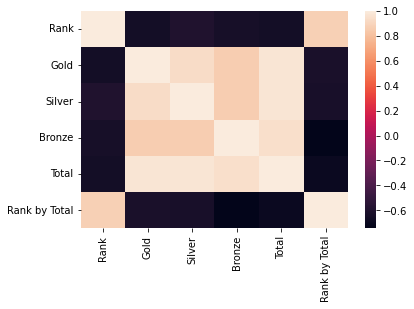

In [65]:

sns.heatmap(medal_count.corr())

In [68]:
#contigency Table
pd.crosstab(index=medal_count["Team/NOC"], columns=medal_count["Gold"] , dropna=True)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39
Team/NOC,,,,,,,,,,,,,,
Argentina,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Armenia,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Australia,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Austria,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Azerbaijan,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uganda,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Ukraine,0,1,0,0,0,0,0,0,0,0,0,0,0,0
United States of America,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='Gold'>

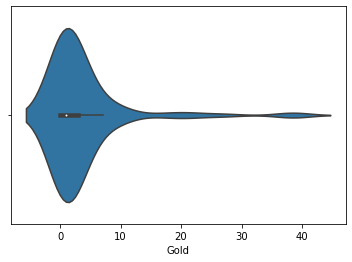

In [73]:
#Violin Plot
sns.violinplot(x=medal_count["Gold"])